In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("2015.csv")
df2 = pd.read_csv("2016.csv")
df3 = pd.read_csv("2017.csv")
df4 = pd.read_csv("2018.csv")
df5 = pd.read_csv("2019.csv")

### Data Cleaning

In [3]:
#check if there are any null values in the data sets
df1.isnull().sum()


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [4]:
df2.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
df3.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [6]:
df4.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [7]:
df5.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [8]:
#missing values found in dataset 2018.csv
#the missing values shall be replaced with mean value of the column

re = df4['Perceptions of corruption']
m = re.median()
re.fillna(m, inplace = True)



In [9]:
df4.isnull().sum()
#no more missing values

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [10]:
#check if there are any duplicate values for each data set

In [11]:
df1.duplicated().sum()

0

In [12]:
df2.duplicated().sum()

0

In [13]:
df3.duplicated().sum()

0

In [14]:
df4.duplicated().sum()

0

In [15]:
df5.duplicated().sum()

0

### Question 1

In [16]:
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [17]:
health_df = df1[(df1['Health (Life Expectancy)'] > 0.5) & (df1['Health (Life Expectancy)'] < 1)]
health_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
131,Sri Lanka,Southern Asia,132,4.271,0.03751,0.83524,1.01905,0.70806,0.53726,0.09179,0.40828,0.67108
133,Bulgaria,Central and Eastern Europe,134,4.218,0.04828,1.01216,1.10614,0.76649,0.30587,0.00872,0.11921,0.89991
134,Egypt,Middle East and Northern Africa,135,4.194,0.03260,0.88180,0.74700,0.61712,0.17288,0.06324,0.11291,1.59927
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195


In [18]:
df2.head()


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [19]:
topCountries = df2.nlargest(10, 'Happiness Score')
topCountries

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [20]:
meanHappinessRegion = df2.groupby('Region')['Happiness Score'].mean()
meanHappinessRegion

Region
Australia and New Zealand          7.323500
Central and Eastern Europe         5.370690
Eastern Asia                       5.624167
Latin America and Caribbean        6.101750
Middle East and Northern Africa    5.386053
North America                      7.254000
Southeastern Asia                  5.338889
Southern Asia                      4.563286
Sub-Saharan Africa                 4.136421
Western Europe                     6.685667
Name: Happiness Score, dtype: float64

#### Finding any outliers


In [82]:
Q1 = df1['Happiness Rank'].quantile(0.25)
Q3 = df1['Happiness Rank'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['Happiness Rank'] < lower_bound) | (df1['Happiness Rank'] > upper_bound)]
outliers

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [21]:
Q1 = df1['Happiness Score'].quantile(0.25)
Q3 = df1['Happiness Score'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['Happiness Score'] < lower_bound) | (df1['Happiness Score'] > upper_bound)]
outliers

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [22]:
Q1 = df1['Standard Error'].quantile(0.25)
Q3 = df1['Standard Error'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['Standard Error'] < lower_bound) | (df1['Standard Error'] > upper_bound)]
outliers

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
39,Suriname,Latin America and Caribbean,40,6.269,0.09811,0.99534,0.97200,0.60820,0.59657,0.13633,0.16991,2.79094
40,Trinidad and Tobago,Latin America and Caribbean,41,6.168,0.10895,1.21183,1.18354,0.61483,0.55884,0.01140,0.31844,2.26882
62,Libya,Middle East and Northern Africa,63,5.754,0.07832,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295,2.09066
64,Jamaica,Latin America and Caribbean,65,5.709,0.13693,0.81038,1.15102,0.68741,0.50442,0.02299,0.21230,2.32038
93,Mozambique,Sub-Saharan Africa,94,4.971,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137
96,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832
100,Swaziland,Sub-Saharan Africa,101,4.867,0.08742,0.71206,1.07284,0.07566,0.30658,0.03060,0.18259,2.48676
115,Liberia,Sub-Saharan Africa,116,4.571,0.11068,0.07120,0.78968,0.34201,0.28531,0.06232,0.24362,2.77729
125,Djibouti,Sub-Saharan Africa,126,4.369,0.08096,0.44025,0.59207,0.36291,0.46074,0.28105,0.18093,2.05125
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [23]:
Q1 = df1['Economy (GDP per Capita)'].quantile(0.25)
Q3 = df1['Economy (GDP per Capita)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['Economy (GDP per Capita)'] < lower_bound) | (df1['Economy (GDP per Capita)'] > upper_bound)]
outliers

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [24]:
Q1 = df1['Family'].quantile(0.25)
Q3 = df1['Family'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['Family'] < lower_bound) | (df1['Family'] > upper_bound)]
outliers

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [25]:
Q1 = df1['Freedom'].quantile(0.25)
Q3 = df1['Freedom'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['Freedom'] < lower_bound) | (df1['Freedom'] > upper_bound)]
outliers

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [77]:
Q1 = df1['Health (Life Expectancy)'].quantile(0.25)
Q3 = df1['Health (Life Expectancy)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['Health (Life Expectancy)'] < lower_bound) | (df1['Health (Life Expectancy)'] > upper_bound)]
outliers

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [78]:
Q1 = df1['Trust (Government Corruption)'].quantile(0.25)
Q3 = df1['Trust (Government Corruption)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['Trust (Government Corruption)'] < lower_bound) | (df1['Trust (Government Corruption)'] > upper_bound)]
outliers

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
16,Luxembourg,Western Europe,17,6.946,0.03499,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
23,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674


In [79]:
Q1 = df1['Generosity'].quantile(0.25)
Q3 = df1['Generosity'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['Generosity'] < lower_bound) | (df1['Generosity'] > upper_bound)]
outliers

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
33,Thailand,Southeastern Asia,34,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945
128,Myanmar,Southeastern Asia,129,4.307,0.04351,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805


In [80]:
Q1 = df1['Dystopia Residual'].quantile(0.25)
Q3 = df1['Dystopia Residual'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['Dystopia Residual'] < lower_bound) | (df1['Dystopia Residual'] > upper_bound)]
outliers

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
13,Mexico,Latin America and Caribbean,14,7.187,0.04176,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
131,Sri Lanka,Southern Asia,132,4.271,0.03751,0.83524,1.01905,0.70806,0.53726,0.09179,0.40828,0.67108
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


## dataset 2

In [26]:
Q1 = df2['Happiness Score'].quantile(0.25)
Q3 = df2['Happiness Score'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df2[(df2['Happiness Score'] < lower_bound) | (df2['Happiness Score'] > upper_bound)]
outliers

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [98]:
Q1 = df2['Happiness Rank'].quantile(0.25)
Q3 = df2['Happiness Rank'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers2 = df2[(df2['Happiness Rank'] < lower_bound) | (df2['Happiness Rank'] > upper_bound)]
outliers2



Q1 = df2['Lower Confidence Interval'].quantile(0.25)
Q3 = df2['Lower Confidence Interval'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers3 = df2[(df2['Lower Confidence Interval'] < lower_bound) | (df2['Lower Confidence Interval'] > upper_bound)]
outliers3

Q1 = df2['Economy (GDP per Capita)'].quantile(0.25)
Q3 = df2['Economy (GDP per Capita)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers4 = df2[(df2['Economy (GDP per Capita)'] < lower_bound) | (df2['Economy (GDP per Capita)'] > upper_bound)]
outliers4

Q1 = df2['Family'].quantile(0.25)
Q3 = df2['Family'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers5 = df2[(df2['Family'] < lower_bound) | (df2['Family'] > upper_bound)]
outliers5

Q1 = df2['Freedom'].quantile(0.25)
Q3 = df2['Freedom'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers6 = df2[(df2['Freedom'] < lower_bound) | (df2['Freedom'] > upper_bound)]
outliers6

Q1 = df2['Health (Life Expectancy)'].quantile(0.25)
Q3 = df2['Health (Life Expectancy)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers7 = df2[(df2['Health (Life Expectancy)'] < lower_bound) | (df2['Health (Life Expectancy)'] > upper_bound)]
outliers7


Q1 = df2['Trust (Government Corruption)'].quantile(0.25)
Q3 = df2['Trust (Government Corruption)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers8 = df2[(df2['Trust (Government Corruption)'] < lower_bound) | (df2['Trust (Government Corruption)'] > upper_bound)]
outliers8


Q1 = df2['Generosity'].quantile(0.25)
Q3 = df2['Generosity'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers9 = df2[(df2['Generosity'] < lower_bound) | (df2['Generosity'] > upper_bound)]
outliers9


Q1 = df2['Dystopia Residual'].quantile(0.25)
Q3 = df2['Dystopia Residual'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers10 = df2[(df2['Dystopia Residual'] < lower_bound) | (df2['Dystopia Residual'] > upper_bound)]

Q1 = df2['Upper Confidence Interval'].quantile(0.25)
Q3 = df2['Upper Confidence Interval'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers11 = df2[(df2['Upper Confidence Interval'] < lower_bound) | (df2['Upper Confidence Interval'] > upper_bound)]
outliers11

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [84]:
outliers2

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [85]:
outliers3

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
39,Suriname,Latin America and Caribbean,40,6.269,0.09811,0.99534,0.97200,0.60820,0.59657,0.13633,0.16991,2.79094
40,Trinidad and Tobago,Latin America and Caribbean,41,6.168,0.10895,1.21183,1.18354,0.61483,0.55884,0.01140,0.31844,2.26882
62,Libya,Middle East and Northern Africa,63,5.754,0.07832,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295,2.09066
64,Jamaica,Latin America and Caribbean,65,5.709,0.13693,0.81038,1.15102,0.68741,0.50442,0.02299,0.21230,2.32038
93,Mozambique,Sub-Saharan Africa,94,4.971,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137
96,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832
100,Swaziland,Sub-Saharan Africa,101,4.867,0.08742,0.71206,1.07284,0.07566,0.30658,0.03060,0.18259,2.48676
115,Liberia,Sub-Saharan Africa,116,4.571,0.11068,0.07120,0.78968,0.34201,0.28531,0.06232,0.24362,2.77729
125,Djibouti,Sub-Saharan Africa,126,4.369,0.08096,0.44025,0.59207,0.36291,0.46074,0.28105,0.18093,2.05125
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [86]:
outliers4

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [87]:
outliers5

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [88]:
outliers6

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [96]:
outliers7

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [101]:
outliers8

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734
19,Luxembourg,Western Europe,20,6.871,6.804,6.938,1.69752,1.03999,0.84542,0.54870,0.35329,0.27571,2.11055
21,Singapore,Southeastern Asia,22,6.739,6.674,6.804,1.64555,0.86758,0.94719,0.48770,0.46987,0.32706,1.99375
27,United Arab Emirates,Middle East and Northern Africa,28,6.573,6.494,6.652,1.57352,0.87114,0.72993,0.56215,0.35561,0.26591,2.21507
35,Qatar,Middle East and Northern Africa,36,6.375,6.178,6.572,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388,1.58224


In [100]:
outliers9

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
29,Malta,Western Europe,30,6.488,6.409,6.567,1.30782,1.09879,0.80315,0.54994,0.17554,0.56237,1.99032
32,Thailand,Southeastern Asia,33,6.474,6.396,6.552,1.08930,1.04477,0.64915,0.49553,0.02833,0.58696,2.57960
78,Indonesia,Southeastern Asia,79,5.314,5.237,5.391,0.95104,0.87625,0.49374,0.39237,0.00322,0.56521,2.03171
118,Myanmar,Southeastern Asia,119,4.395,4.327,4.463,0.34112,0.69981,0.39880,0.42692,0.20243,0.81971,1.50655


In [99]:
outliers10


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
74,Hong Kong,Eastern Asia,75,5.458,5.362,5.554,1.51070,0.87021,0.95277,0.48079,0.31647,0.40097,0.92614
75,Somalia,Sub-Saharan Africa,76,5.440,5.321,5.559,0.00000,0.33613,0.11466,0.56778,0.31180,0.27225,3.83772
116,Sri Lanka,Southern Asia,117,4.415,4.322,4.508,0.97318,0.84783,0.62007,0.50817,0.07964,0.46978,0.91681
136,Botswana,Sub-Saharan Africa,137,3.974,3.875,4.073,1.09426,0.89186,0.34752,0.44089,0.10769,0.12425,0.96741
151,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


## dataset 3

In [92]:
df3.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [102]:
Q1 = df3['Happiness.Score'].quantile(0.25)
Q3 = df3['Happiness.Score'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df3[(df3['Happiness.Score'] < lower_bound) | (df3['Happiness.Score'] > upper_bound)]
outliers



Q1 = df3['Happiness.Rank'].quantile(0.25)
Q3 = df3['Happiness.Rank'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers2 = df3[(df3['Happiness.Rank'] < lower_bound) | (df3['Happiness.Rank'] > upper_bound)]
outliers2



Q1 = df3['Whisker.high'].quantile(0.25)
Q3 = df3['Whisker.high'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers3 = df3[(df3['Whisker.high'] < lower_bound) | (df3['Whisker.high'] > upper_bound)]
outliers3

Q1 = df3['Economy..GDP.per.Capita.'].quantile(0.25)
Q3 = df3['Economy..GDP.per.Capita.'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers4 = df3[(df3['Economy..GDP.per.Capita.'] < lower_bound) | (df3['Economy..GDP.per.Capita.'] > upper_bound)]
outliers4

Q1 = df3['Family'].quantile(0.25)
Q3 = df3['Family'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers5 = df3[(df3['Family'] < lower_bound) | (df3['Family'] > upper_bound)]
outliers5

Q1 = df3['Freedom'].quantile(0.25)
Q3 = df3['Freedom'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers6 = df3[(df3['Freedom'] < lower_bound) | (df3['Freedom'] > upper_bound)]
outliers6

Q1 = df3['Health..Life.Expectancy.'].quantile(0.25)
Q3 = df3['Health..Life.Expectancy.'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers7 = df3[(df3['Health..Life.Expectancy.'] < lower_bound) | (df3['Health..Life.Expectancy.'] > upper_bound)]
outliers7


Q1 = df3['Trust..Government.Corruption.'].quantile(0.25)
Q3 = df3['Trust..Government.Corruption.'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers8 = df3[(df3['Trust..Government.Corruption.'] < lower_bound) | (df3['Trust..Government.Corruption.'] > upper_bound)]
outliers8


Q1 = df3['Generosity'].quantile(0.25)
Q3 = df3['Generosity'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers9 = df3[(df3['Generosity'] < lower_bound) | (df3['Generosity'] > upper_bound)]
outliers9




,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
80,Indonesia,81,5.262,5.352889,5.171112,0.995539,1.274445,0.492346,0.443323,0.611705,0.015317,1.429477
113,Myanmar,114,4.545,4.614740,4.475260,0.367111,1.123236,0.397523,0.514492,0.838075,0.188816,1.115290


In [103]:
outliers

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


In [104]:
outliers2

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


In [105]:
outliers3

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


In [106]:
outliers4

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


In [107]:
outliers5

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
142,Benin,143,3.657,3.745784,3.568217,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929,1.885631
149,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [108]:
outliers6

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


In [109]:
outliers7

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


In [110]:
outliers8

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211
14,Ireland,15,6.977,7.043352,6.910649,1.535707,1.558231,0.809783,0.573110,0.427858,0.298388,1.773869
17,Luxembourg,18,6.863,6.923686,6.802314,1.741944,1.457584,0.845089,0.596628,0.283181,0.318834,1.619512
20,United Arab Emirates,21,6.648,6.722047,6.573952,1.626343,1.266410,0.726798,0.608345,0.360942,0.324490,1.734704


## dataset 4

In [28]:
df5.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### As the correlation value is closer to 1, therefore Happiness Score and Economy of dataset 2 (2016) are strongly related. As Economy increases, the Happiness Score increases simultaneously

In [29]:
correlation = df2['Happiness Score'].corr(df2['Economy (GDP per Capita)'])
correlation

0.7903220167261062

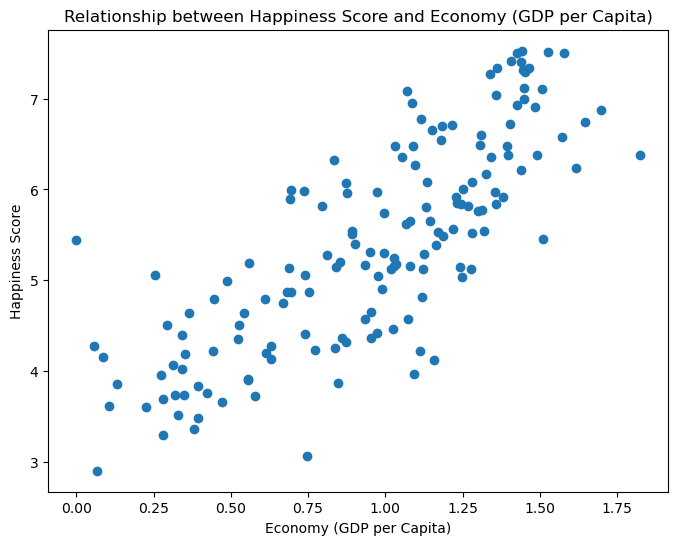

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(df2['Economy (GDP per Capita)'], df2['Happiness Score'])
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title('Relationship between Happiness Score and Economy (GDP per Capita)')
plt.show()

In [32]:
df_2015_subset = df1[['Country', 'Region', 'Happiness Score']].copy()
df_2015_subset.rename(columns={'Happiness Score': '2015'}, inplace=True)

df_2016_subset = df2[['Country', 'Region', 'Happiness Score']].copy()
df_2016_subset.rename(columns={'Happiness Score': '2016'}, inplace=True)

df_2017_subset = df3[['Country', 'Happiness.Score']].copy()
df_2017_subset.rename(columns={'Happiness.Score': '2017'}, inplace=True)

df_2018_subset = df4[['Country or region', 'Score']].copy()
df_2018_subset.rename(columns={'Country or region': 'Country', 'Score': '2018'}, inplace=True)

df_2019_subset = df5[['Country or region', 'Score']].copy()
df_2019_subset.rename(columns={'Country or region': 'Country', 'Score': '2019'}, inplace=True)

new_df = pd.merge(df_2015_subset, df_2016_subset)
new_df = pd.merge(new_df, df_2017_subset)
new_df = pd.merge(new_df, df_2018_subset)
new_df = pd.merge(new_df, df_2019_subset)

new_df

,Country,Region,2015,2016,2017,2018,2019
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554
4,Canada,North America,7.427,7.404,7.316,7.328,7.278
...,...,...,...,...,...,...,...
136,Rwanda,Sub-Saharan Africa,3.465,3.515,3.471,3.408,3.334
137,Benin,Sub-Saharan Africa,3.340,3.484,3.657,4.141,4.883
138,Syria,Middle East and Northern Africa,3.006,3.069,3.462,3.462,3.462
139,Burundi,Sub-Saharan Africa,2.905,2.905,2.905,2.905,3.775


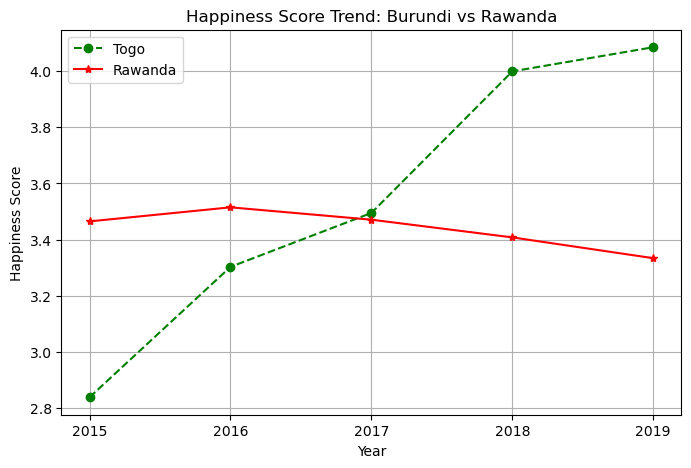

In [34]:
data_country1 = new_df.loc[new_df['Country'] == 'Togo', ['2015', '2016', '2017', '2018', '2019']].values.flatten()
data_country2 = new_df.loc[new_df['Country'] == 'Rwanda', ['2015', '2016', '2017', '2018', '2019']].values.flatten()

years = ['2015', '2016', '2017', '2018', '2019']

plt.figure(figsize=(8, 5))
plt.plot(years, data_country1,marker='o',color='g',markerfacecolor='g',linestyle='--',label= 'Togo')
plt.plot(years, data_country2,marker='*',color='r',markerfacecolor='r',linestyle='-' , label='Rawanda')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Score Trend: Burundi vs Rawanda')
plt.grid(True)
plt.legend()
plt.show()

In [35]:
econ_df = df1[(df1['Economy (GDP per Capita)'] < 0.5)]
econ_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
76,Kyrgyzstan,Central and Eastern Europe,77,5.286,0.03823,0.47428,1.15115,0.65088,0.43477,0.04232,0.30030,2.23270
84,Zambia,Sub-Saharan Africa,85,5.129,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032
93,Mozambique,Sub-Saharan Africa,94,4.971,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137
96,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832
105,Tajikistan,Central and Eastern Europe,106,4.786,0.03198,0.39047,0.85563,0.57379,0.47216,0.15072,0.22974,2.11399
108,Bangladesh,Southern Asia,109,4.694,0.03077,0.39753,0.43106,0.60164,0.40820,0.12569,0.21222,2.51767
114,Zimbabwe,Sub-Saharan Africa,115,4.610,0.04290,0.27100,1.03276,0.33475,0.25861,0.08079,0.18987,2.44191
115,Liberia,Sub-Saharan Africa,116,4.571,0.11068,0.07120,0.78968,0.34201,0.28531,0.06232,0.24362,2.77729
118,Haiti,Latin America and Caribbean,119,4.518,0.07331,0.26673,0.74302,0.38847,0.24425,0.17175,0.46187,2.24173


In [37]:
float_columns_2015 = df1.select_dtypes(include=['float64'])
float_columns_2016 = df2.select_dtypes(include=['float64'])

corr_2015 = float_columns_2015.corr()
corr_2016 = float_columns_2016.corr()

corr_2015

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


# Question 2

In [38]:
df = pd.read_csv('earth_surface_temperatures.csv')
df.head()

,Years,Month,Country,Temperature,Monthly_variation,Anomaly
0,1848,5,Afghanistan,19.573,-0.297,2.037
1,1848,6,Afghanistan,23.894,-0.796,2.136
2,1848,7,Afghanistan,26.507,-0.113,1.937
3,1848,8,Afghanistan,24.498,-0.462,1.937
4,1848,9,Afghanistan,19.068,-1.272,1.865


In [39]:
df.isnull().sum()

Years                    0
Month                    0
Country                  0
Temperature          25753
Monthly_variation    25753
Anomaly              25753
dtype: int64

In [40]:
df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)
df['Monthly_variation'].fillna(df['Monthly_variation'].mean(), inplace=True)
df['Anomaly'].fillna(df['Anomaly'].mean(), inplace=True)
df.isnull().sum()

Years                0
Month                0
Country              0
Temperature          0
Monthly_variation    0
Anomaly              0
dtype: int64

In [41]:
df['Years'].map(type)

0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
534566    <class 'int'>
534567    <class 'int'>
534568    <class 'int'>
534569    <class 'int'>
534570    <class 'int'>
Name: Years, Length: 534571, dtype: object

In [42]:
df['Month'].map(type)

0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
534566    <class 'int'>
534567    <class 'int'>
534568    <class 'int'>
534569    <class 'int'>
534570    <class 'int'>
Name: Month, Length: 534571, dtype: object

In [43]:
df['Country'].map(type)

0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
534566    <class 'str'>
534567    <class 'str'>
534568    <class 'str'>
534569    <class 'str'>
534570    <class 'str'>
Name: Country, Length: 534571, dtype: object

In [44]:
df['Temperature'].map(type)

0         <class 'float'>
1         <class 'float'>
2         <class 'float'>
3         <class 'float'>
4         <class 'float'>
               ...       
534566    <class 'float'>
534567    <class 'float'>
534568    <class 'float'>
534569    <class 'float'>
534570    <class 'float'>
Name: Temperature, Length: 534571, dtype: object

In [45]:
df['Monthly_variation'].map(type)

0         <class 'float'>
1         <class 'float'>
2         <class 'float'>
3         <class 'float'>
4         <class 'float'>
               ...       
534566    <class 'float'>
534567    <class 'float'>
534568    <class 'float'>
534569    <class 'float'>
534570    <class 'float'>
Name: Monthly_variation, Length: 534571, dtype: object

In [46]:
df['Anomaly'].map(type)

0         <class 'float'>
1         <class 'float'>
2         <class 'float'>
3         <class 'float'>
4         <class 'float'>
               ...       
534566    <class 'float'>
534567    <class 'float'>
534568    <class 'float'>
534569    <class 'float'>
534570    <class 'float'>
Name: Anomaly, Length: 534571, dtype: object

In [47]:
df['Date'] = pd.to_datetime(df[['Month', 'Years']].assign(day=14))
df.insert(0, 'Date', df.pop('Date'))
df['Date'] = df['Date'].dt.strftime('%m-%Y')
df


,Date,Years,Month,Country,Temperature,Monthly_variation,Anomaly
0,05-1848,1848,5,Afghanistan,19.573,-0.297,2.037
1,06-1848,1848,6,Afghanistan,23.894,-0.796,2.136
2,07-1848,1848,7,Afghanistan,26.507,-0.113,1.937
3,08-1848,1848,8,Afghanistan,24.498,-0.462,1.937
4,09-1848,1848,9,Afghanistan,19.068,-1.272,1.865
...,...,...,...,...,...,...,...
534566,08-2020,2020,8,Zimbabwe,19.621,1.401,0.466
534567,09-2020,2020,9,Zimbabwe,22.638,1.008,0.246
534568,10-2020,2020,10,Zimbabwe,24.588,0.458,0.294
534569,11-2020,2020,11,Zimbabwe,25.934,1.724,1.035


In [48]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]
outliers

,Date,Years,Month,Country,Temperature,Monthly_variation,Anomaly
17077,02-1956,1956,2,Antarctica,-16.628,0.712,1.165
17078,03-1956,1956,3,Antarctica,-24.355,-0.025,1.423
17079,04-1956,1956,4,Antarctica,-28.810,-0.010,1.667
17080,05-1956,1956,5,Antarctica,-31.041,-0.351,1.056
17081,06-1956,1956,6,Antarctica,-31.425,0.335,1.000
...,...,...,...,...,...,...,...
504590,01-1950,1950,1,Ukraine,-12.679,-7.009,0.137
504638,01-1954,1954,1,Ukraine,-12.628,-6.958,0.290
504639,02-1954,1954,2,Ukraine,-13.741,-9.341,0.500
504663,02-1956,1956,2,Ukraine,-12.788,-8.388,0.532


In [49]:
df.describe()

,Years,Month,Temperature,Monthly_variation,Anomaly
count,534571.000000,534571.000000,534571.000000,534571.000000,534571.000000
mean,1917.483008,6.500676,17.059014,-0.075495,0.888305
std,65.628555,3.452036,10.928609,1.201271,1.043615
min,1743.000000,1.000000,-40.349000,-10.566000,0.037000
25%,1873.000000,4.000000,10.433000,-0.625000,0.301000
50%,1924.000000,7.000000,19.784000,-0.075495,0.525000
75%,1972.000000,10.000000,25.774000,0.511000,0.960000
max,2020.000000,12.000000,39.384000,11.817000,12.203000


In [50]:
average_temp = df.groupby('Country')['Temperature'].mean()
average_temp

Country
Afghanistan       14.476292
Albania           12.760633
Algeria           22.063457
American Samoa    25.880581
Andorra           11.142018
                    ...    
Virgin Islands    25.354143
Western Sahara    23.297923
Yemen             26.169337
Zambia            21.356084
Zimbabwe          21.185253
Name: Temperature, Length: 233, dtype: float64

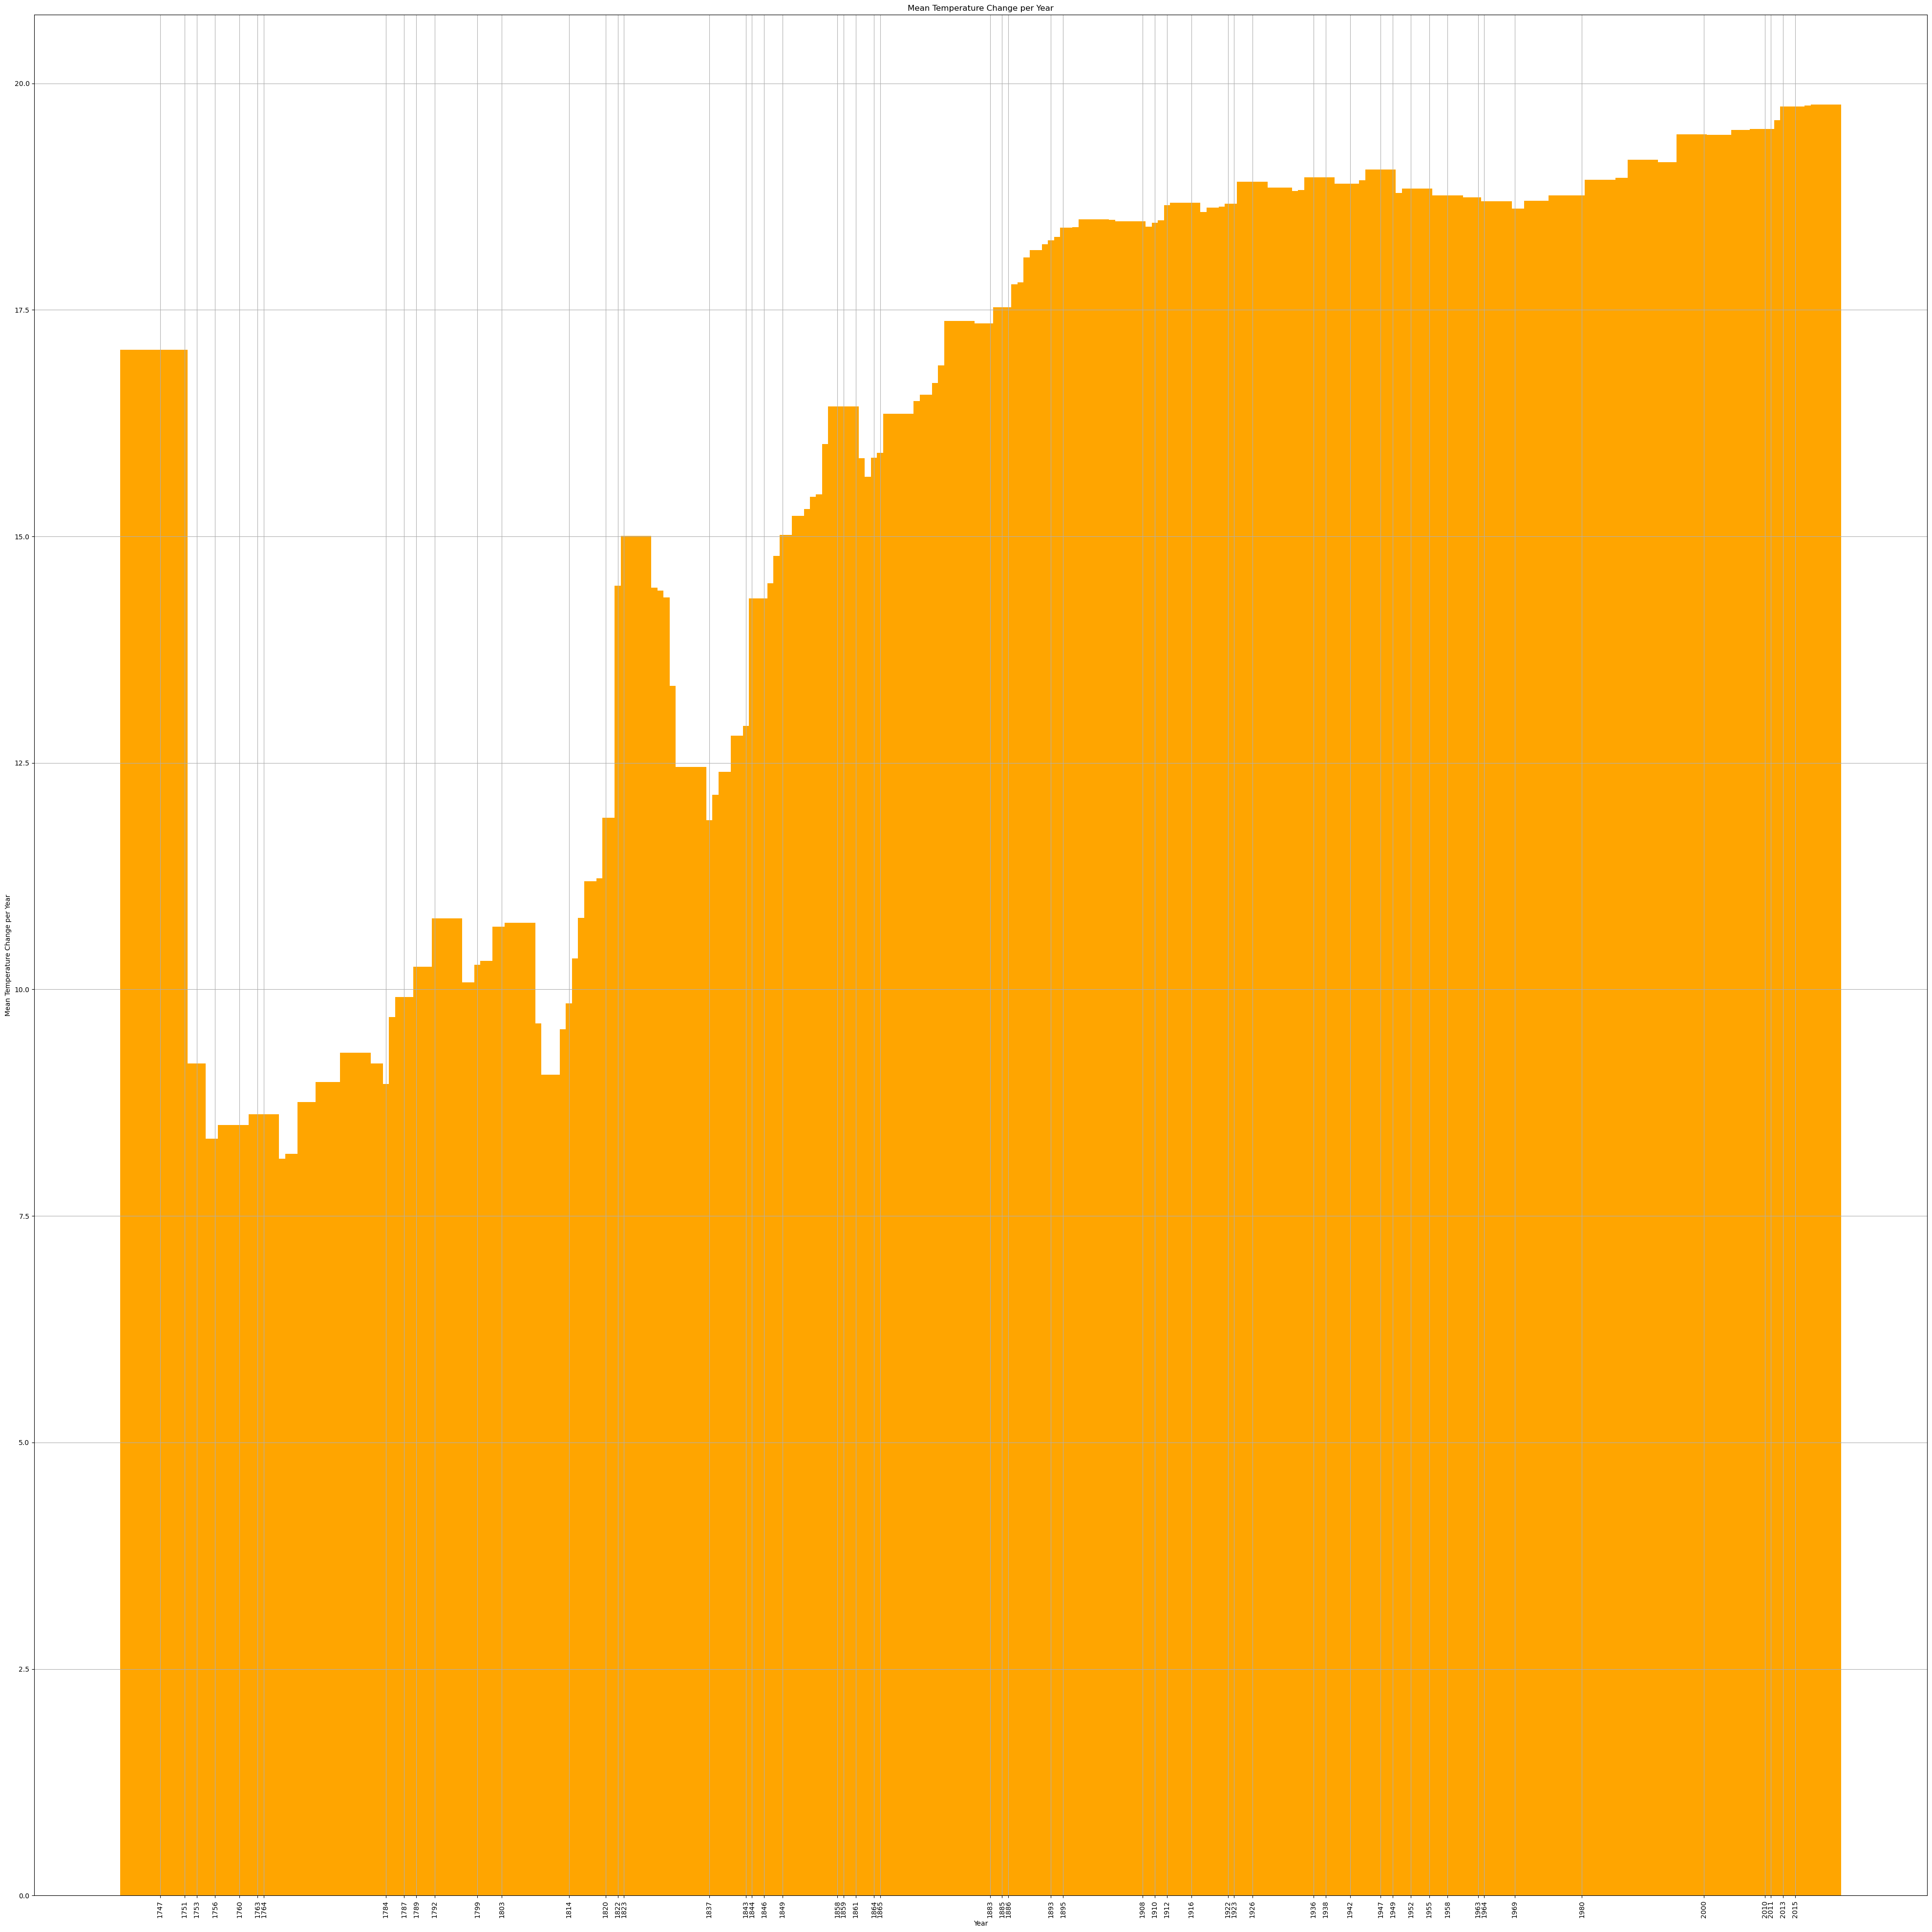

In [52]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')
df['Year'] = df['Date'].dt.year
# mean temperature change per year, and reset the index
grouped_data = df.groupby(['Country', 'Year'])['Temperature'].mean().reset_index()

# mean temperature change per year for each country
mean_temp_change_per_year = grouped_data.groupby('Year')['Temperature'].mean()

# Sort countries by mean temperature change per year in Ascending order
mean_temp_change_per_year = mean_temp_change_per_year.sort_values(ascending=True)

plt.figure(figsize=(50, 50))
plt.bar(mean_temp_change_per_year.index, mean_temp_change_per_year.values, color='orange', width = 5)
plt.xlabel('Year')
plt.ylabel('Mean Temperature Change per Year')
plt.title('Mean Temperature Change per Year')
plt.grid(True)
plt.xticks(mean_temp_change_per_year.index[::5], mean_temp_change_per_year.index[::5], rotation=90)
plt.show()


#### According to the bar chart above, it is evident that there has been a rise in the global temoeratures over the years.

In [53]:
highest_temps = df.groupby('Country').apply(lambda x: x.loc[x['Temperature'].idxmax()])[['Country','Date' ,'Temperature']]
highest_temps

,Country,Date,Temperature
Country,,,
Afghanistan,Afghanistan,2019-07-01,28.867
Albania,Albania,2012-07-01,26.041
Algeria,Algeria,2018-07-01,36.157
American Samoa,American Samoa,2016-02-01,29.122
Andorra,Andorra,2003-08-01,23.806
...,...,...,...
Virgin Islands,Virgin Islands,2020-08-01,29.537
Western Sahara,Western Sahara,2009-07-01,33.021
Yemen,Yemen,2019-07-01,33.078


In [54]:
Lowest_temps = df.groupby('Country').apply(lambda x: x.loc[x['Temperature'].idxmin()])[['Country','Date' ,'Temperature']]
Lowest_temps

,Country,Date,Temperature
Country,,,
Afghanistan,Afghanistan,2008-01-01,-4.588000
Albania,Albania,1767-01-01,-2.421000
Algeria,Algeria,1891-01-01,9.807000
American Samoa,American Samoa,1876-10-01,17.059014
Andorra,Andorra,1766-01-01,-1.082000
...,...,...,...
Virgin Islands,Virgin Islands,1827-06-01,17.059014
Western Sahara,Western Sahara,1952-01-01,14.167000
Yemen,Yemen,1881-08-01,17.059014


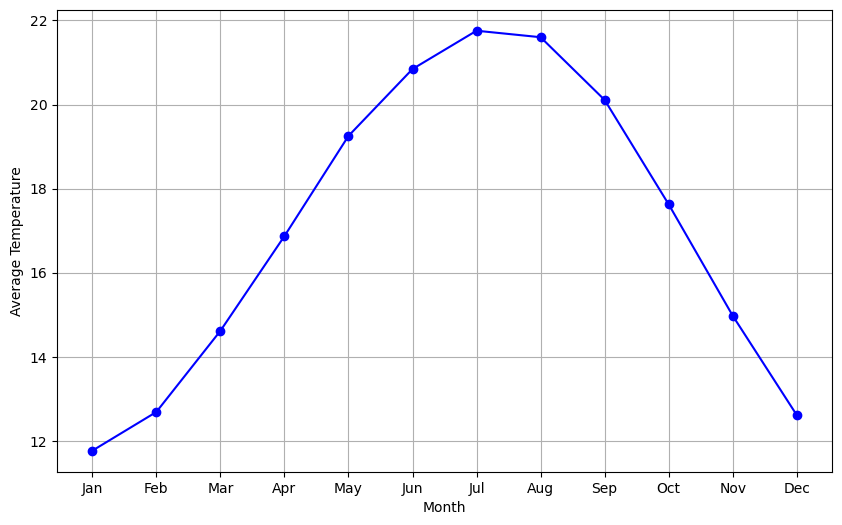

In [55]:
monthly_avg_temp = df.groupby('Month')['Temperature'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

#### In many regions, temperatures tend to rise during spring and summer months and fall during autumn and winter months. This pattern is often reflected as a curve in temperature data charts. 

In [56]:
highest_anomalies = df.groupby('Month').apply(lambda x: x.loc[x['Anomaly'].idxmax()])[['Country','Month','Temperature','Anomaly']]
highest_anomalies

,Country,Month,Temperature,Anomaly
Month,,,,
1,Czech Republic,1,1.096,11.234
2,Luxembourg,2,2.853,12.184
3,Greenland,3,-23.345,9.929
4,Czech Republic,4,6.030,9.347
5,Denmark (Europe),5,11.857,9.401
6,Liechtenstein,6,12.048,10.664
7,Czech Republic,7,17.725,10.053
8,Czech Republic,8,19.054,10.081
9,Switzerland,9,10.901,6.966


In [57]:
lowest_anomalies = df.groupby('Month').apply(lambda x: x.loc[x['Anomaly'].idxmin()])[['Country','Month' ,'Temperature','Anomaly']]
lowest_anomalies

,Country,Month,Temperature,Anomaly
Month,,,,
1,Zimbabwe,1,23.060,0.063
2,Germany,2,5.105,0.039
3,Hungary,3,3.808,0.048
4,Suriname,4,26.375,0.037
5,Guernsey,5,12.910,0.058
6,South Korea,6,22.183,0.062
7,Sweden,7,14.269,0.043
8,Brazil,8,24.718,0.062
9,Mexico,9,23.040,0.048


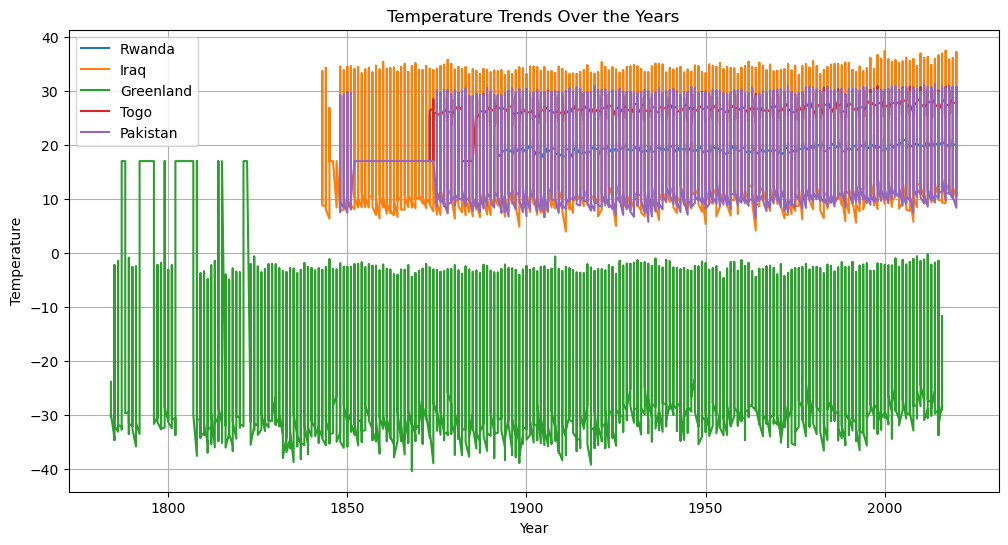

In [59]:
df.isnull().sum()
countries = ['Rwanda', 'Iraq', 'Greenland', 'Togo', 'Pakistan']
filtered_data = df[df['Country'].map(lambda x: x in countries)]

plt.figure(figsize=(12, 6))

for country in countries:
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Temperature'], label=country)

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Trends Over the Years')
plt.legend()
plt.grid(True)
plt.show()

#### highest variation can be seen in Greenland's Temperature.
#### Togo and Rawanda have the least variation in Temperature.

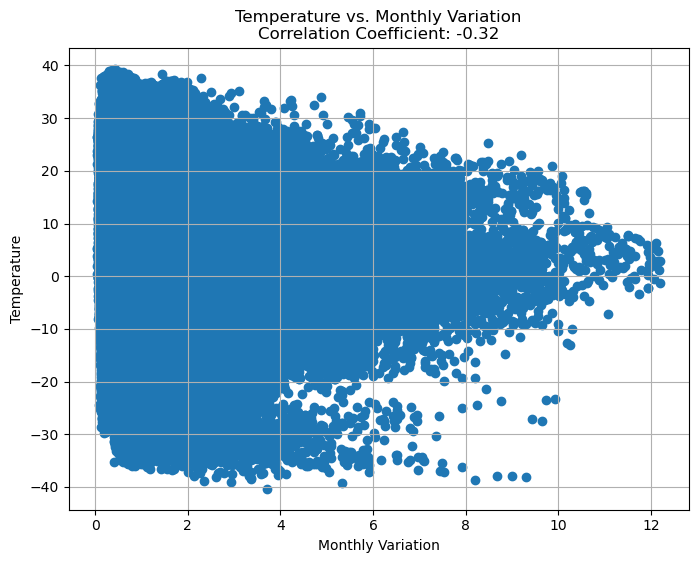

In [67]:
correlation = df['Temperature'].corr(df['Anomaly'])
plt.figure(figsize=(8, 6))
plt.scatter(df['Anomaly'], df['Temperature'], alpha=1)
plt.xlabel('Monthly Variation')
plt.ylabel('Temperature')
plt.title(f'Temperature vs. Monthly Variation\nCorrelation Coefficient: {correlation:.2f}')
plt.grid(True)
plt.show()

### BONUS

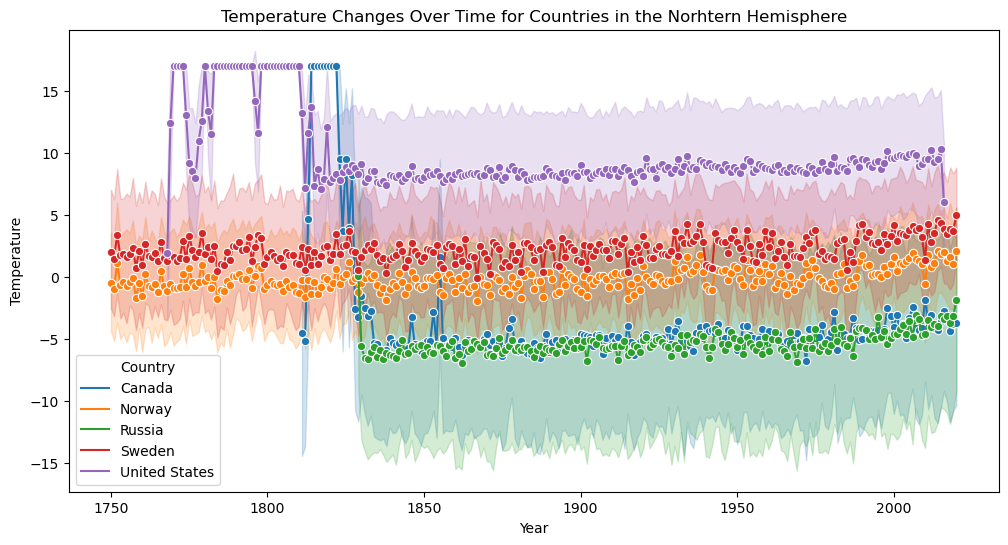

In [76]:
selected_countries = ['Canada', 'United States', 'Russia', 'Norway', 'Sweden']

filtered_data = df[df['Country'].isin(selected_countries)]


plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='Year', y='Temperature', hue='Country', marker='o')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Changes Over Time for Countries in the Norhtern Hemisphere')
plt.legend(title='Country')
plt.show()

##### it is evident from the above lineplot that the countries in the northern hemisphere (especially those with a higher altitude), are now experiencing a higher temperature change like never before. Reasons may include global warming, industrialization etc.